In [ ]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# then give an example of what a true positive, true negative, type I and type II errors would look like. Note 
# that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more 
# precise questions that could be tested.



In [ ]:
#     Has the network latency gone up since we switched internet service providers?

# H0 = The network latency has not changed since switching ISPs
# HA = The network latency has increased since switching ISPs (i.e. the internet is slower)

# True positive: We reject H0 in favor of HA AND HA is true 
# -- We conclude internet has gotten slower AND it has actually gotten slower

# True negative: We fail to reject the H0 AND H0 is true 
# -- We conclude the internet is the same speed AND it is actually the same speed

# Type I error is a false positive: H0 is true, but we reject it in favor of HA 
# -- we conclude the internet is slower, but actually it is not slower

# Type II error is a false negative: We fail to reject H0, but actually HA is true 
# -- We conclude internet speed has not changed, BUT actually it has changed

In [ ]:
#     Is the website redesign any good?

# H0 = website redesign has had no change in usefulness. We'll measure in terms of number of page visits 
# HA = website redesign has increasead in usefulness (num of page visits has increased) -- (Do we need to declare an amount for the increase?)

# True Pos: We reject H0 in favor of HA AND HA is true (number of page visits has increased)

# True Neg: We fail to reject H0 AND H0 is true (number of page visits hasn't changed)

# Type I Error (False Positive): We reject H0 in favor of HA, but H0 is true
#  -- We falsely conclude the number of page visits has increased

# Type II Error (False Negative): We fail to reject H0 when HA is true
#  -- We falsely conclude there is not an increase in page visits, when actually there is an increase

In [ ]:
#     Is our television ad driving more sales?

# H0 = the tv ad has had no impact on sales
# HA = the tv ad has increased sales


# True Pos: We reject H0 in favor of HA AND HA is true
# -- We conclude the ad has increased sales AND the ad has increased sales
# -- ACTUALLY: can we determine causality?

# True Neg: We fail to reject H0 AND H0 is true
# -- We conclude sales have not increased AND they actually have not increased

# Type I Error (False Positive): We reject H0 in favor of HA, but H0 is true
# -- We conclude sales have increased, BUT actually they have not increased

# Type II Error (False Negative): We fail to reject H0 when HA is true
# -- We conclude sales have not increased BUT actually they have increased

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [37]:
# Answer with the type of test you would use (assume normal distribution):

#     Is there a difference in grades of students on the second floor compared to grades of all students?
# Answer: One-Sample, two-tail t-test because we comparing a group that is within the larger group

#     Are adults who drink milk taller than adults who dont drink milk?
# Answer: Independent one-tail t-test (aka 2-sample, one-tail t-test) because we have two groups 
#         that do not overlap with each other

#     Is the the price of gas higher in texas or in new mexico?
# Answer: Independent, one-tail t-test (aka 2-sample, one-tail t-test) because we have two groups 
#         that do not overlap with each other

#     Are there differences in stress levels between students who take data science vs students who take 
# web development vs students who take cloud academy?
# Answer: Analysis of Variance aka ANOVA because we have more than 2 groups and we are trying to determine
#         if there are differences between the groups. By definition, two-tail, since ANOVA can't test for >, <



In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 
# 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of 
# significance.

In [39]:
# two-sample, two-tail test

# Step 1: Plot distributions via histogram
#  First make the distributions

office1_days_dist = stats.norm(90, 15)
office2_days_dist = stats.norm(100, 20)

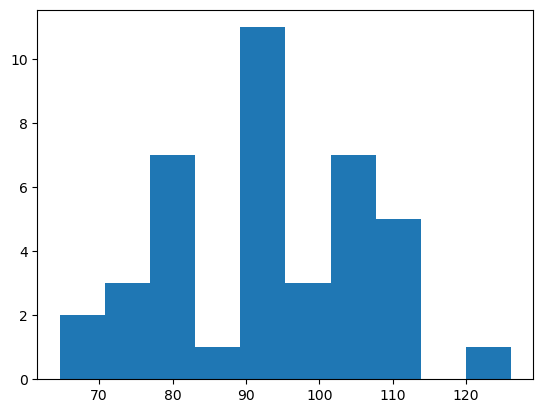

13.533809744258884

In [45]:
office1_sim = office1_days_dist.rvs(40)
plt.hist(office1_sim)
plt.show()
office1_sim.std()

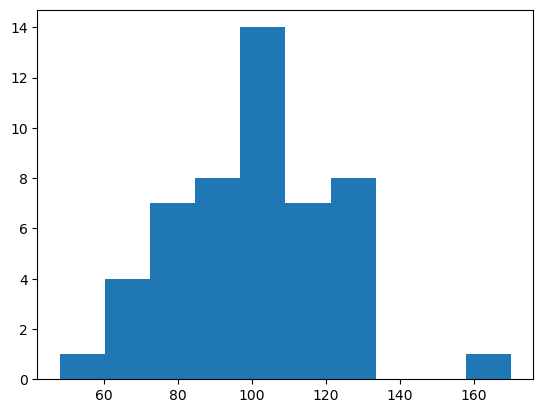

In [46]:
office2_sim = office2_days_dist.rvs(50)
plt.hist(office2_sim)
plt.show()

In [ ]:
# Step 2: Establish Hypothesis:
# H0: There is NO difference in the average number of days it takes to sell a home between office 1 and office 2
# Ha: There IS a difference (so this is a 2 tailed test; later we will test for p<alpha)

In [47]:
# Step 3: Set alpha = .05
alpha = .05

In [48]:
# Step 4: Verify assumptions:
# Independence - Yes because the data points / distributions come from two different groups
# Normal distributioin? - Yes because the question said so, and I created normal dist's via stats.norm
# Equal variances? use stats.levene
s, p = stats.levene(office1_sim, office2_sim)
s, p
# p is < alpha so variances are NOT equal. So we set equal_var = False in the next step
# Also
# print(office1_sim.var())
# print(office2_sim.var())

(5.471134861103068, 0.021598090765881893)

In [49]:
# Step 5: Compute test statistic and probability (t-statistic & p-value) using stats.ttest_ind
t, p = stats.ttest_ind(office1_sim, office2_sim, equal_var=False)
t, p

(-2.2906102740428533, 0.024495039592841668)

In [50]:
if p < alpha:
    print("There IS a difference between the average number of days it takes to sell a house between office 1 and 2.")
else:
    print("There is NO difference between the avg num of days it takes to sell a house btwn office 1 and 2.")

There IS a difference between the average number of days it takes to sell a house between office 1 and 2.


In [21]:
# Load the mpg dataset and use it to answer the following questions:

from pydataset import data
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:>

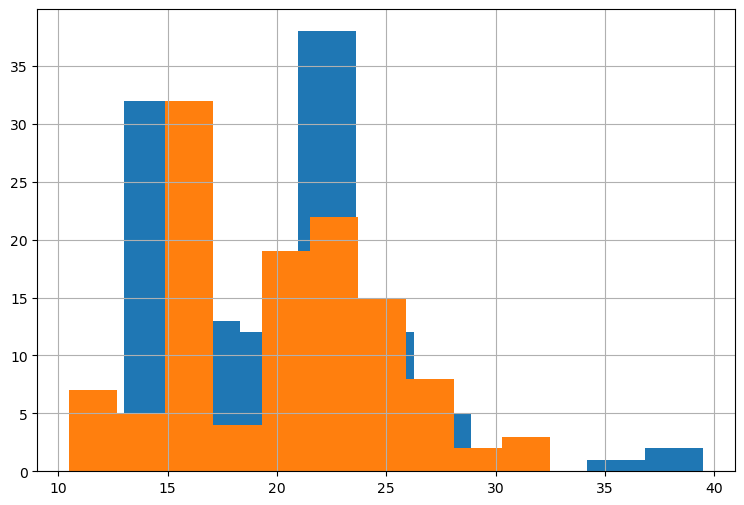

In [52]:
#     Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# Since we're comparing two different groups, I will use the stats.ttest_ind, aka 2-sample, 2-tail t-test
# Step 1: Plot distributions via histogram
# First capture data into two arrays (_1999 and _2008) where each element is the average of cty and hwy
# for all cars with model years 1999 and 2008, respectively.

fuel_eff_1999 = (df[df.year==1999].cty + df[df.year==1999].hwy) / 2
fuel_eff_2008 = (df[df.year==2008].cty + df[df.year==2008].hwy) / 2

plt.figure(figsize=(9,6))
fuel_eff_1999.hist()
fuel_eff_2008.hist()
# sns.histplot(fuel_eff_1999)
# sns.histplot(fuel_eff_2008)
# plt.show()
# fuel_eff_1999.mean(), fuel_eff_2008.mean()

In [32]:
# step 2: Establish hypothesis:
# H0: There is NO difference between fuel efficiency of cars from 1999 and cars from 2008
# Ha: There IS a difference (two-tail test, so just testing for p<alpha)

# step 3: Set alpha = .05
alpha = .05

In [34]:
# step 4: verify assumptions (ind, normal, equal variance)
# indepence? - Yes. one group's data points do not depend on the other group(?)
# normal? - Yes because we have > 30 data points in each group (117 in both grps to be precise)
# variance? - Use stats.levene
s, p = stats.levene(fuel_eff_1999, fuel_eff_2008)
s, p
# p is .8555... which is > alpha of .05, so the two distributions have "equal" variances

(0.033228136671080453, 0.855517569468803)

In [54]:
# step 5: Compute t-statistic and p value
t, p = stats.ttest_ind(fuel_eff_1999, fuel_eff_2008)
t, p
# p is .82637... which is > alpha, so we fail to reject H0

(0.21960177245940962, 0.8263744040323578)

In [55]:
# step 6, make a decision
# p is .82637... which is > alpha, so we fail to reject H0

if p < alpha:
    print("There IS a difference between the fuel efficiency of cars made in 1999 and 2008.")
else:
    print("There is NO significant difference between the fuel efficiency of cars made in 1999 and 2008.")


There is NO significant difference between the fuel efficiency of cars made in 1999 and 2008.


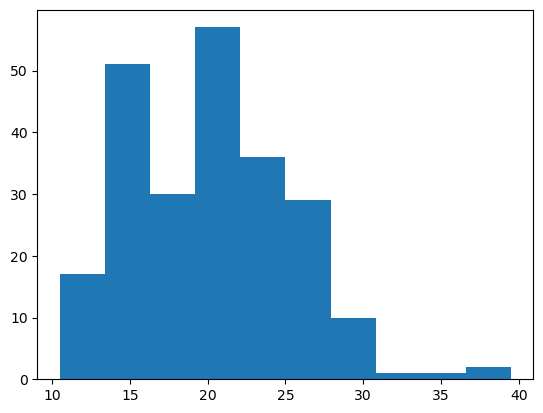

In [50]:
####     Are compact cars more fuel-efficient than the average car?

# Since we're comparing one group that is within the larger group I'll use stats.ttest_1samp 
# aka One-sample t-test, AND it will be a 1 tail test
# Step 1: Plot distributions via histograms:

fuel_eff_compact = (df[df['class']=='compact'].cty + df[df['class']=='compact'].hwy) / 2
fuel_eff_overall = (df.cty + df.hwy) / 2

plt.hist(fuel_eff_overall)
plt.show()

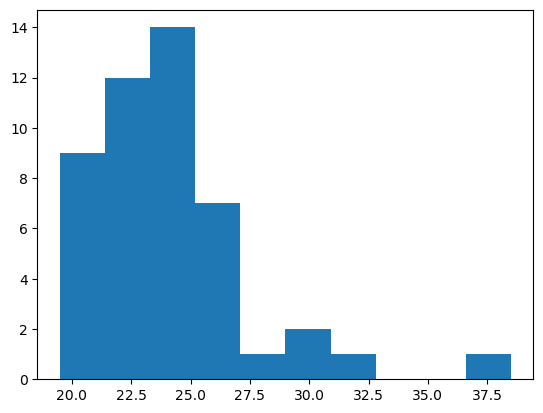

In [51]:
plt.hist(fuel_eff_compact)
plt.show()

In [52]:
# Step 2: Establish Hypothesis
# H0 - Fuel eff of compact cars is <= fuel eff of all cars
# Ha - Fuel eff. of compact cars is > fuel eff of all cars

# Step 3: Set significance level, alpha = .05
alpha = .05

In [53]:
# Step 4: Verify assumptions: normal or >= 30 observations
fuel_eff_compact.shape
# We have 47 observations for compact and way more than 47 for all cars, so YES we pass the normal assumption

(47,)

In [54]:
# Step 5: Compute test statistics
t, p = stats.ttest_1samp(fuel_eff_compact, fuel_eff_overall.mean())
t, p

(7.896888573132533, 4.1985637943171486e-10)

In [74]:
# step 6, make a decision
# p is 4.198...e-10 which is < alpha, so we reject H0

if (p/2 < alpha) and (t > 0):
    print("The fuel efficiency of compact cars is greater than the fuel eff. of all cars.")
else:
    print("The fuel efficiency of compact cars is less than or equal to the fuel eff. of all cars.")

The fuel efficiency of compact cars is greater than the fuel eff. of all cars.


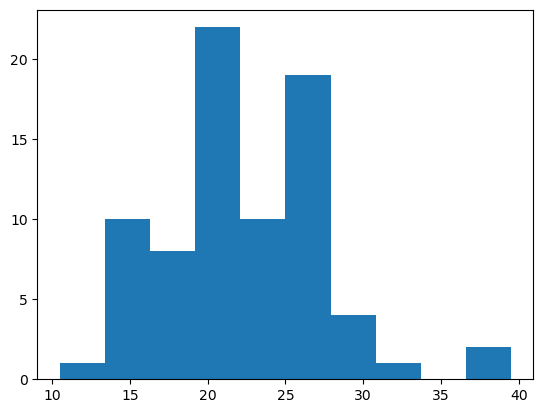

In [57]:
#     Do manual cars get better gas mileage than automatic cars?

# I'll use a Independent t-test aka a 2-sample, 1-tail t-test since we have two distinct groups
# Step 1, plot distributions via histograms

fuel_eff_man = (df[df.trans.str.contains('man')].cty + df[df.trans.str.contains('man')].hwy) / 2
fuel_eff_auto = (df[df.trans.str.contains('auto')].cty + df[df.trans.str.contains('auto')].hwy) / 2

plt.hist(fuel_eff_man)
plt.show()

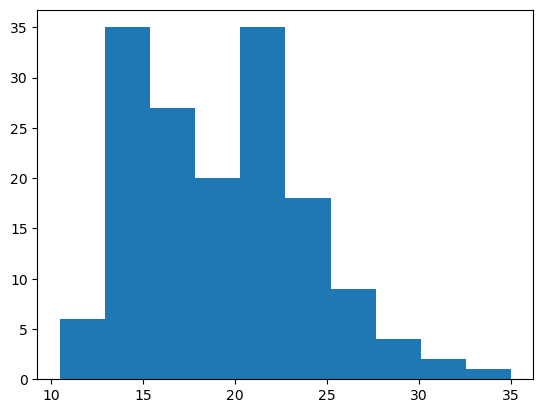

In [58]:
plt.hist(fuel_eff_auto)
plt.show()

In [59]:
# Step 2: Establish hypothesis
# H0: Fuel eff of manuals is <= automatics
# Ha: Fuel eff of manuals is > automatics

# Step 3: Set alpha = .05
alpha = .05

In [60]:
# Step 4: Verify assumptions: Independence, normal dist, equal variances
# Independence? Yes, each data point does not depend on any other data point
# Normal: We have >= 30 data points (77 for man, 157 for auto)
fuel_eff_man.shape, fuel_eff_auto.shape

((77,), (157,))

In [61]:
# Equal Variance? - use stats.levene
s, p = stats.levene(fuel_eff_man, fuel_eff_auto)
s, p
# p is .6545... which is > alpha of .05, so Equal Variance

(0.20075824847529639, 0.6545276355131857)

In [62]:
# Step 5: Compute statistics via ttest_ind
t, p = stats.ttest_ind(fuel_eff_man, fuel_eff_auto)
t, p

(4.593437735750014, 7.154374401145685e-06)

In [73]:
# Step 6: Make Decision
# since p/2 is < alpha and t is > 0, we can reject H0 in favor of Ha

if (p/2 < alpha) and (t > 0):
    print("Manuals have greater fuel efficiency than automatics.")
else:
    print("Manuals do NOT have greater fuel efficiency than automatics")

Manuals have greater fuel efficiency than automatics.
